# Лабораторная работа 2. Линейная регрессия и регуляризация.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Задание 1

1. Для следующих данных постройте модель эстиматора с помощью полиномиальной регрессии. 
2. Подберите оптимальную степень полиномиальных базисных функций избегая переобучения.
3. Визуализируйте процесс переобучения графически и с помощью подсчётов ошибки на обучающей выборке.

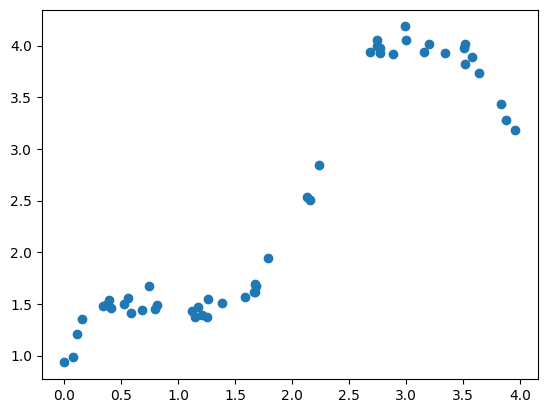

In [2]:
rng = np.random.RandomState(1)
x = 4 * rng.rand(50)
y = np.sin(x) + np.cos(2*x) + x + 0.1 * rng.randn(50)
plt.scatter(x, y);

In [3]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [9]:
def fit_show(x,y, model):
    model.fit(x.reshape(-1,1), y.reshape(-1,1))
    pred = model.predict(x.reshape(-1,1))
    plt.figure(figsize=(15,6))
    plt.scatter(x,y, label="True")
    plt.scatter(x, pred, color='r', label="Pred")
    plt.legend() 
    plt.show()

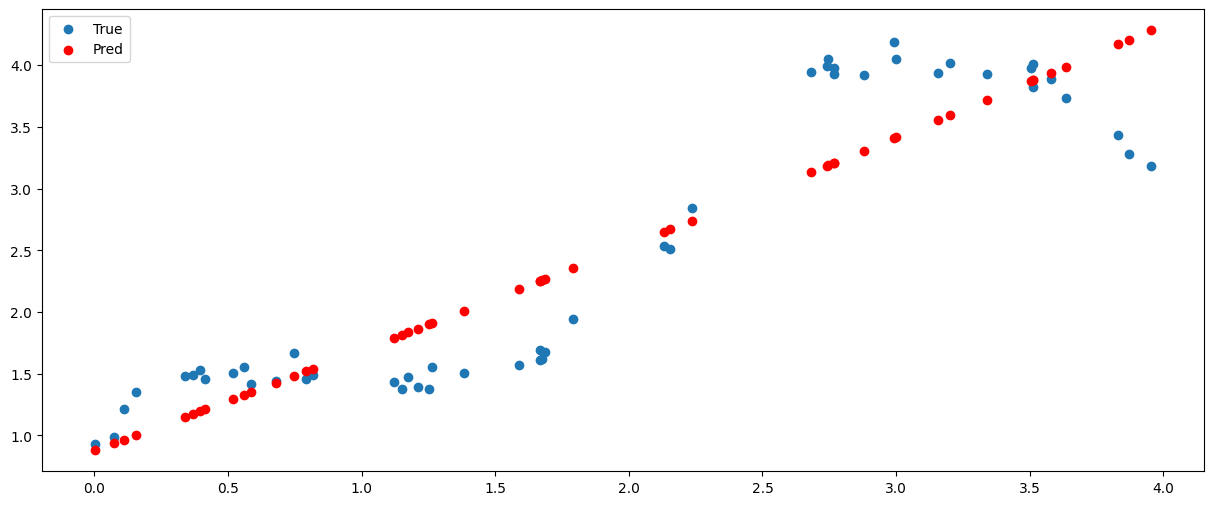

In [10]:
fit_show(x,y, poly_model)

## Задание 2

1. Постройте модель прогноза для данных из задания 1, используя модель регрессии с регуляризацией Ridge.
2. Постройте модель прогноза для данных из задания 1, используя модель регрессии с регуляризацией Lasso.
3. Постройте модель прогноза для данных из задания 1, используя модель регрессии с регуляризацией Elastic Net (изучите её самостоятельно).
4. Как изменяются коэффициенты w(i) функций регрессоров? Визуализируйте изменения коэффициентов для всех моделей из заданий 1 и 2.
5. Реализуйте одну регуляризационную модель самостоятельно.
        5.1 Для одной из моделей используйте аналитическую формулу.
        5.2 Для другой используйте градиентный спуск с постоянной скоростью.
        
6. Визулизируйте, как регуляризация помогает бороться с переобучением и некорректными данными на примере искусственных данных. Обратите внимание на сингулярные и плохо обусловленные матрицы (был пример на лекции).

7. Реализуйте метод градиентного спуска для нахождения минимума функции 2-ух переменных. В графических окнах постройте соответствующие картинки.

In [6]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [7]:
poly_model_lasso = make_pipeline(PolynomialFeatures(2), Lasso())

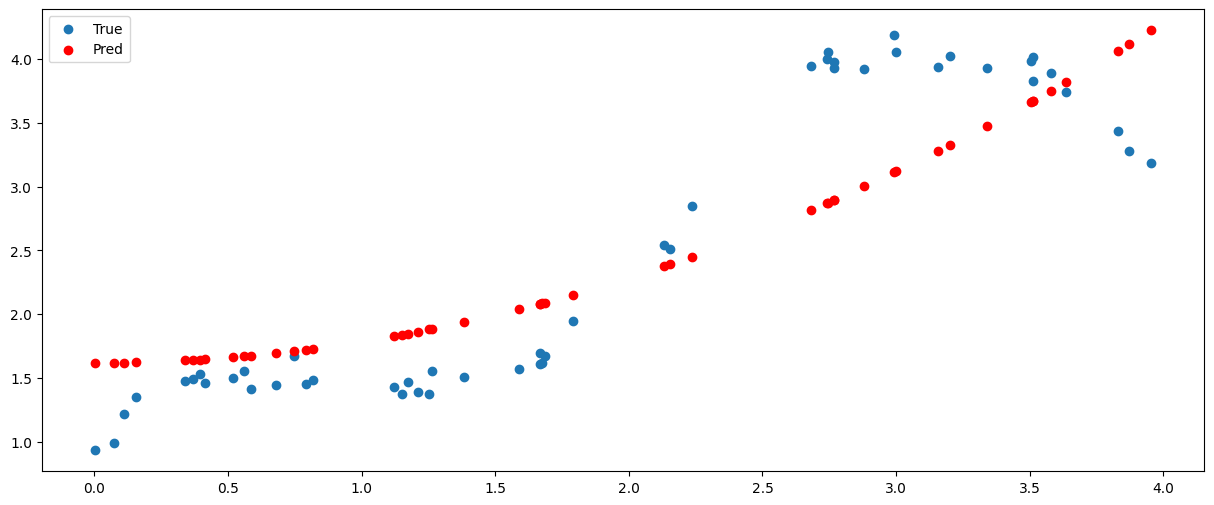

In [12]:
fit_show(x,y, poly_model_lasso)

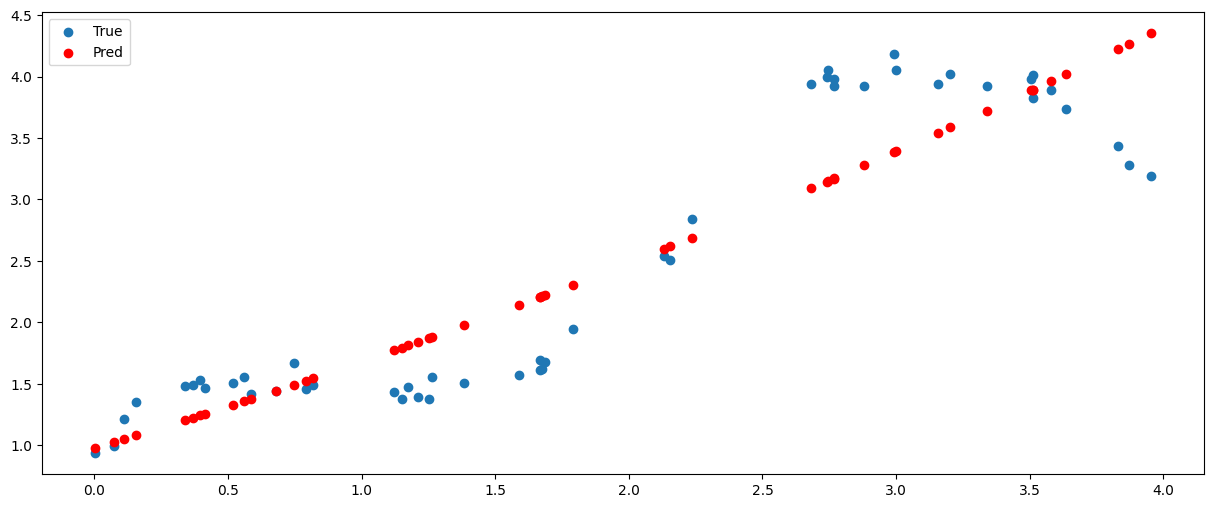

In [13]:
poly_model_ridge = make_pipeline(PolynomialFeatures(2), Ridge())
fit_show(x,y, poly_model_ridge)

## Задание 3.

Используя регуляризацию попытайтесь улучшить модель прогноза велотрафика из ЛР1.

## Задание 4.

Постройте оптимальную модель для прогноза выплаты по страховке в зависимости от количества страховых кейсов. Визуализируйте подбор гиперпараметров модели.

https://data.world/anujonthemove/auto-insurance-in-sweden

## Задание 5

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 